In [1]:
import pandas as pd
df = pd.read_excel(path + '../datasets/Credit_card.xlsx', index_col='ID')

print(df.shape)
df.head(10)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [3]:
# Category distribution
class_freq = (df.groupby('default payment next month').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
default payment next month
0    23364
1     6636
dtype: int64


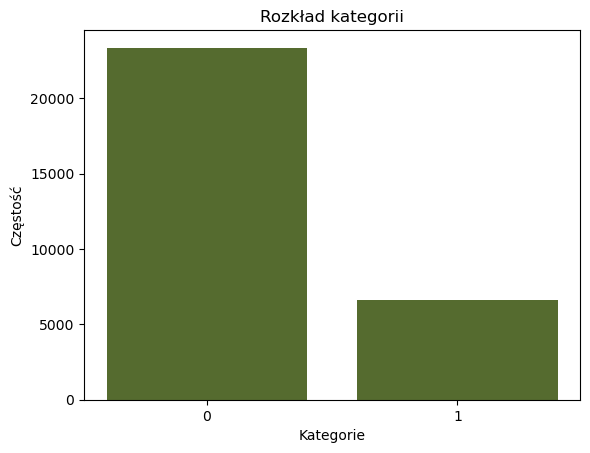

In [4]:
# Category distribution chart  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.hist( df['default payment next month'], bins=[-0.5, 0.5, 1.5], rwidth=0.8,  color='darkolivegreen')
plt.xticks([0, 1])
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Value counts')
plt.show()

In [39]:
minority_len = len(df[df['default payment next month'] == 1])
majority_len = len(df[df['default payment next month'] == 0])
print("minority len:", minority_len)
print("majority len:", majority_len)

minority len: 6636
majority len: 23364
difference: 16728


In [65]:
# df['default payment next month'] = pd.to_numeric(df['default payment next month']) # errors='coerce'
minority_idxs = df[df['default payment next month'] == 1].index
majority_idxs = df[df['default payment next month'] == 0].index

# Those yeld different results.
# print(df.iloc[minority_idxs[0]])
# print(df.loc[minority_idxs[0]])
# only .loc is correct here

rnd_choice_minority_idxs = np.random.choice(minority_idxs, majority_len, replace=True)
over_sample_idxs = np.concatenate([rnd_choice_minority_idxs, majority_idxs])

df_over_sample = pd.DataFrame(df.loc[over_sample_idxs])

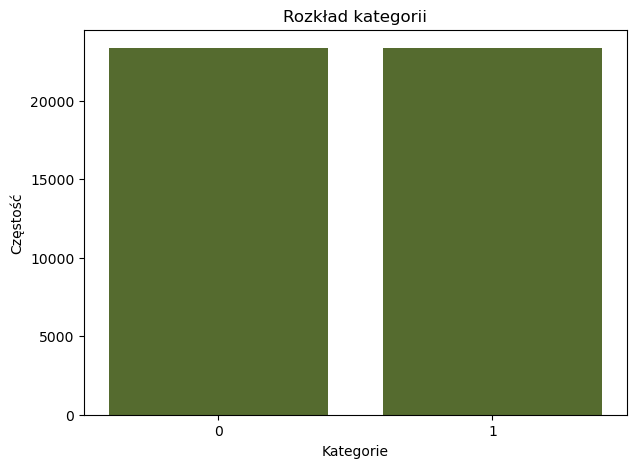

In [66]:
plt.hist(df_over_sample['default payment next month'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='darkolivegreen')
plt.xticks([0, 1])
plt.xlabel('Categories')
plt.ylabel('Frequences')
plt.title('Value counts')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_over_sample, test_size=0.3, shuffle = True)

position_of_target_label = 23

X_train = train.iloc[:,:position_of_target_label]
y_train = train.iloc[:,position_of_target_label:] 
X_test = test.iloc[:,:position_of_target_label]
y_test = test.iloc[:,position_of_target_label:] 

print(X_train.shape)
print(X_test.shape)

(32709, 23)
(14019, 23)


In [55]:
print(y_train.shape)
print(y_test.shape)
y_train.head()

(32709, 1)
(14019, 1)


,default payment next month
ID,
24385,0
12915,0
11392,0
11531,0
20260,0


# Decision Tree

In [56]:
# GridSearchCV Decision Tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [5,10,15]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))

best score 0.8300025816396831
best param {'criterion': 'log_loss', 'max_depth': 15}
Accuracy: 0.7683857621798987
[[5248 1834]
 [1413 5524]]
F1 measure: 0.772857642532354


In [57]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold

tree_clf = DecisionTreeClassifier(max_depth=15, criterion='log_loss') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))

#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(tree_clf, X_train, y_train, cv=kfold, scoring='f1')
#print('Cross validation: mean',  round(cv_results.mean(),2), ', standard deviation: ', round(cv_results.std(),2))

Accuracy: 0.7695270704044511
[[5282 1800]
 [1431 5506]]
F1 measure: 0.7731517236537246


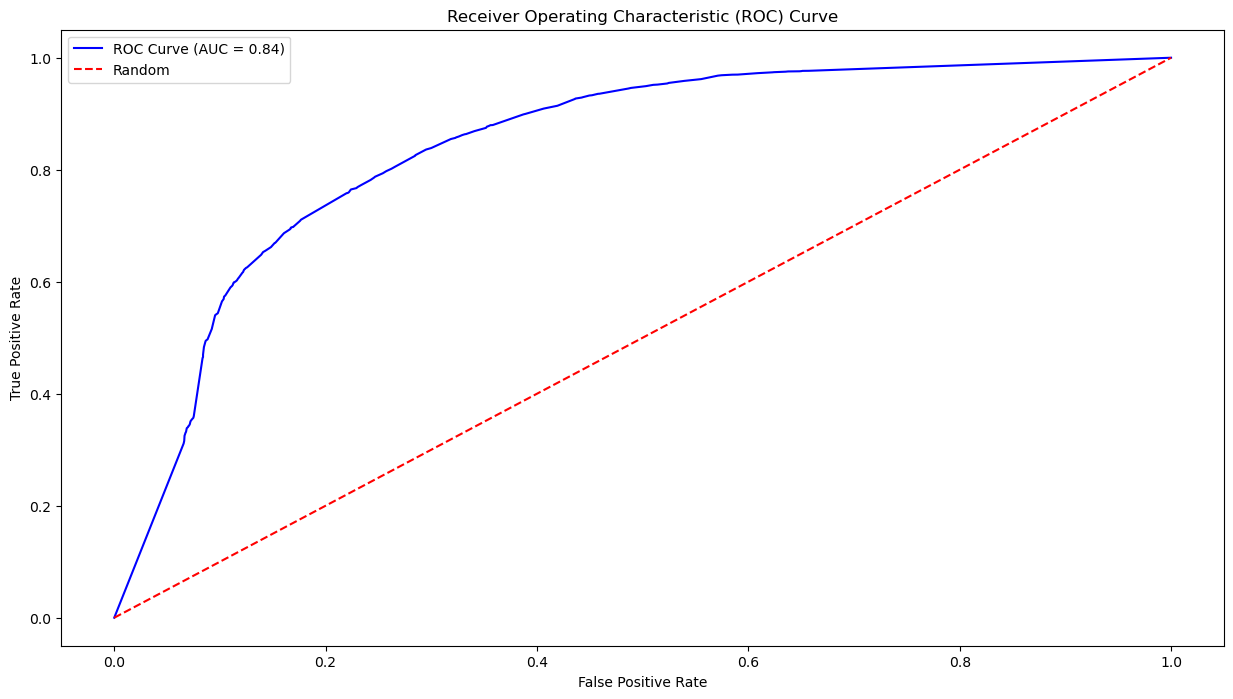

In [58]:
# ROC for Decision Tree
from sklearn.metrics import roc_curve, roc_auc_score

probs = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

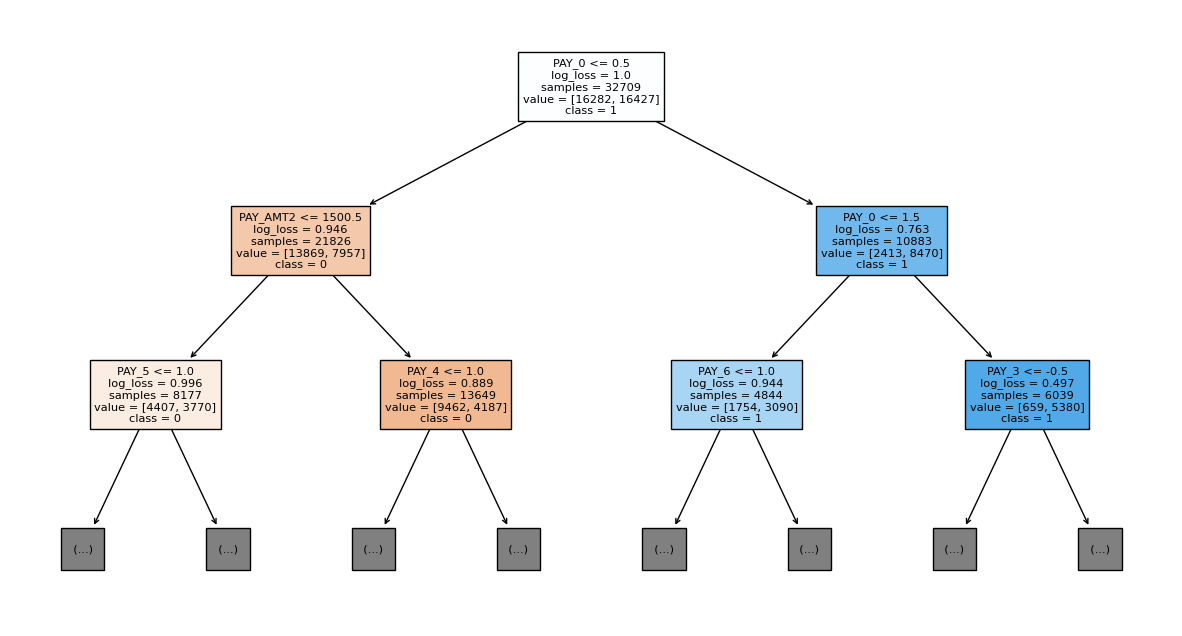

In [59]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["0", "1"]
tree.plot_tree(tree_clf, feature_names=f_names, 
                   class_names=t_names, filled=True, max_depth=2)
plt.show()

In [60]:
# Decision Tree - Text form
from sklearn.tree import export_text
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
r = export_text(tree_clf, feature_names = f_names)
print(r)

|--- PAY_0 <= 0.50
|   |--- PAY_AMT2 <= 1500.50
|   |   |--- PAY_5 <= 1.00
|   |   |   |--- PAY_2 <= 1.00
|   |   |   |   |--- PAY_AMT4 <= 2201.00
|   |   |   |   |   |--- PAY_AMT3 <= 797.50
|   |   |   |   |   |   |--- BILL_AMT1 <= 10400.50
|   |   |   |   |   |   |   |--- PAY_3 <= 1.00
|   |   |   |   |   |   |   |   |--- PAY_AMT5 <= 1153.00
|   |   |   |   |   |   |   |   |   |--- BILL_AMT5 <= -938.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- BILL_AMT5 >  -938.50
|   |   |   |   |   |   |   |   |   |   |--- AGE <= 62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- AGE >  62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |--- PAY_AMT5 >  1153.00
|   |   |   |   |   |   |   |   |   |--- BILL_AMT2 <= -102.00
|   |   |   |   |   |   |   |   |   |   |--- BILL_AMT4 <= -25.00
|   |   |   |   |   | 

# Random Forest

In [61]:
# GridSearchCV Rabdin Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 15],
    'n_estimators' : [100, 150]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

best score 0.9083699605357489
best param {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.8416434838433554
[[6095  987]
 [1233 5704]]
F1 measure: 0.8371000880540064


In [62]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 15)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8401455167986305
[[6095  987]
 [1254 5683]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7082
           1       0.85      0.82      0.84      6937

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019



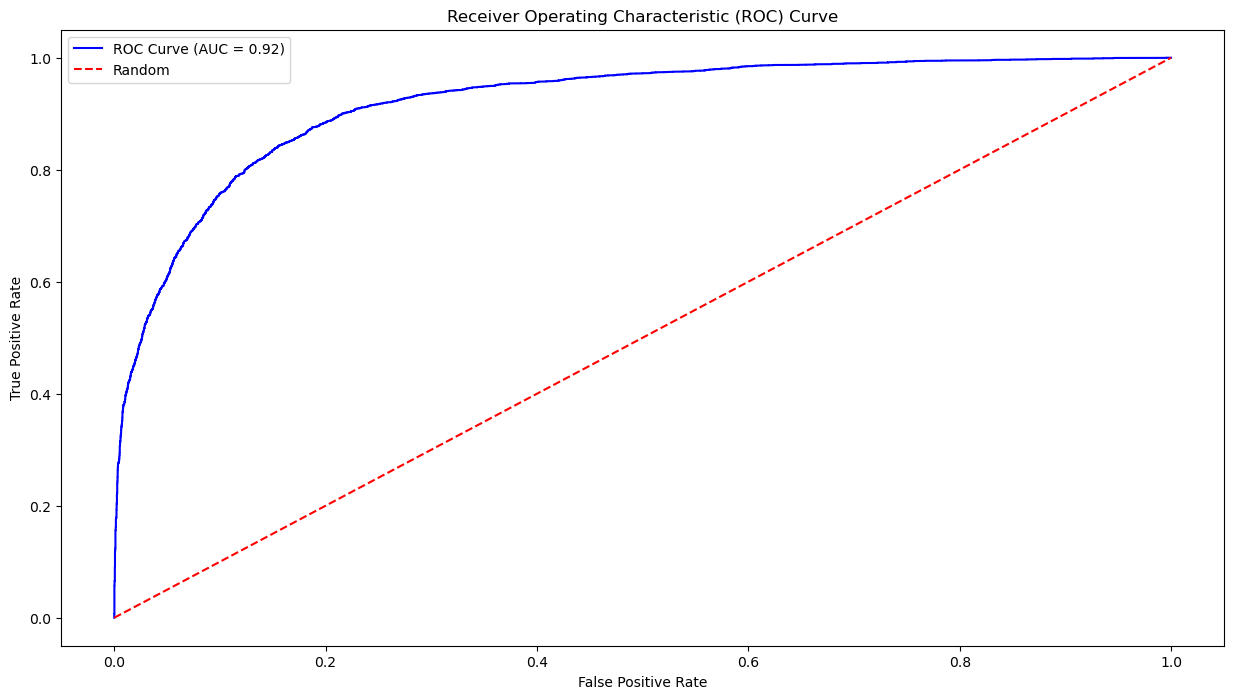

In [63]:
# ROC for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score

probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

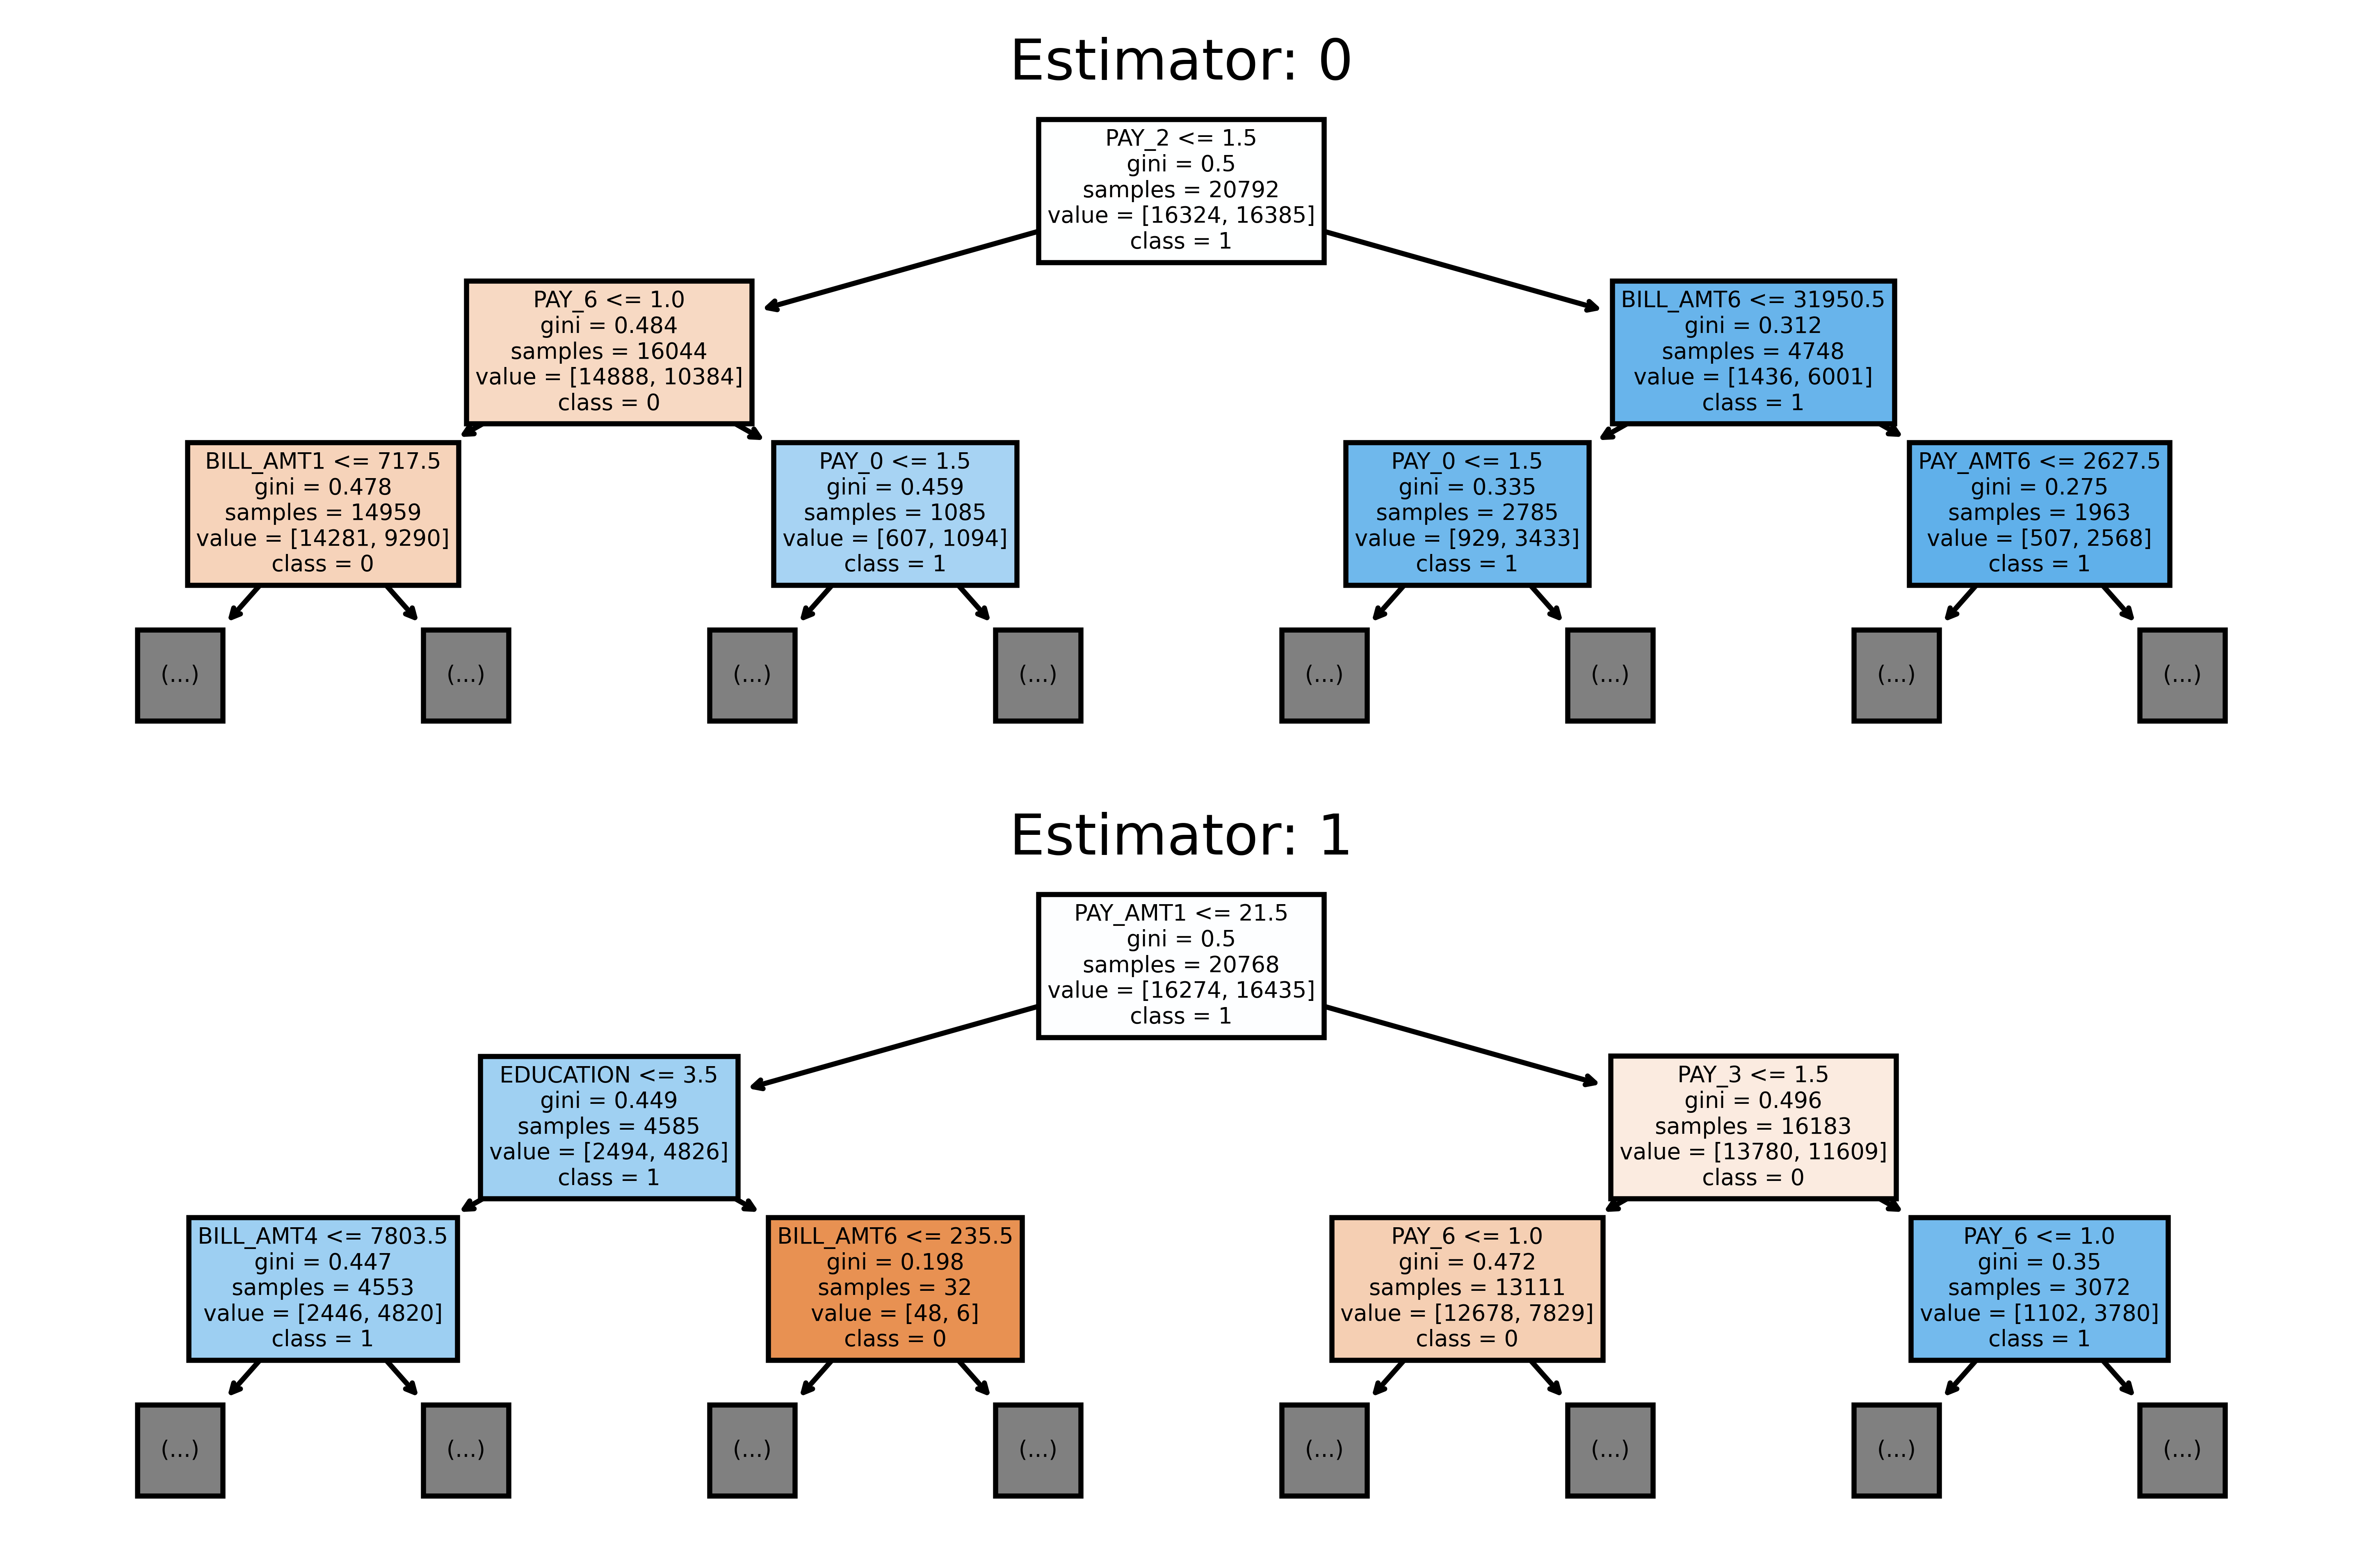

In [64]:
# Random Forest visualization
from sklearn import tree 
import matplotlib.pyplot as plt
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["0", "1"]
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (8,5), dpi=900)
for index in range(0, 2):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = f_names, 
                   class_names=t_names,
                   filled = True,
                   ax = axes[index],
                   max_depth=2);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)